## 深度学习框架 PyTorch【精讲版】

1.  **从线性回归开始**
    *   1.1 方法 1：通过模型计算系数和截距
    *   1.2 方法 2：通过最小二乘法计算系数和截距
    *   1.3 生成虚拟数据
    *   1.4 分离 train 和 valid

2.  **tensor 知识点**
    *   2.1 将 numpy array 转换为 tensor
    *   2.2 将数据部署到 device 上（CPU 或 GPU）
    *   2.3 tensor 类型转换为 numpy array 类型
    *   2.4 为学习参数设置 requires_grad

3.  **梯度下降法（手动实现）**
    *   3.1 随机初始化参数/权重
    *   3.2 前向传播：计算模型预测值
    *   3.3 计算损失
    *   3.4 反向传播：计算梯度
    *   3.5 更新参数
    *   3.6 整合代码

4.  **自动求导：backward 反向传播**
    *   4.1 代码重构，backward() 反向传播，自动计算梯度
    *   4.2 更新参数，梯度置零

5.  **优化器 optimizer**
    *   5.1 定义一个 SGD

6.  **损失函数 loss**
    *   6.1 示例：计算损失值
    *   6.2 更新代码

7.  **前向传播【模型预测】代码升级**
    *   7.1 定义一个模型类
    *   7.2 获取模型参数
    *   7.3 将模型部署到 device 上
    *   7.4 完整代码升级

8.  **序列模型 Sequential Model, 基于BERT模型**
    *   8.1 用序列模型替代线性回归模型

9.  **Dataset (对数据集封装)**
    *   9.1 自定义一个 Dataset 类
    *   9.2 PyTorch 中封装的类: TensorDataset

10. **DataLoader 对数据集进行 batch 分批处理**

11. **random\_split 切分数据集**

12. **模型验证**
    *   12.1 模型训练函数
    *   12.2 模型验证函数
    *   12.3 代码升级


# 从线性回归开始



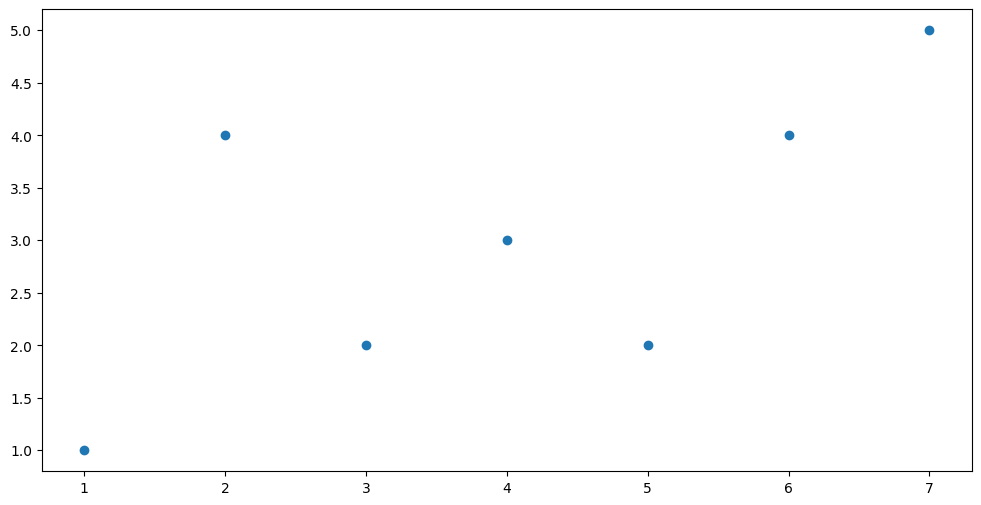

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 数据
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 4, 2, 3, 2, 4, 5])

# 绘制散点图
plt.figure(figsize=(12, 6))
plt.scatter(x, y)
plt.show()


#1.1方法 1：通过模型计算系数和截距

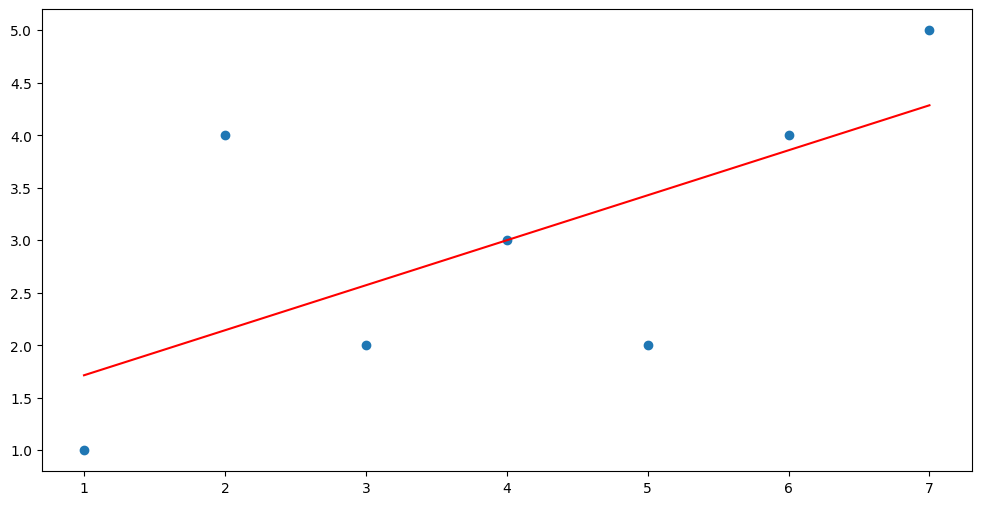

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 创建模型对象
model = LinearRegression()

# 模型训练
model.fit(x.reshape(-1, 1), y)

# 获取模型参数
w1 = model.coef_
b1 = model.intercept_

# 预测
y_pred = w1 * x + b1


import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(12, 6))

# 绘制散点图
plt.scatter(x, y)

# 绘制回归线
plt.plot(x, y_pred, c='r')

# 显示图形
plt.show()


## 1.2 方法 2：通过最小二乘法计算系数和截距

线性回归模型的系数 $a$（斜率）和 $b$（y轴截距）的计算公式如下：

$$
a = \frac{\sum_{i=1}^{m} (x^{(i)} - \overline{x})(y^{(i)} - \overline{y})}{\sum_{i=1}^{m} (x^{(i)} - \overline{x})^2}
$$


$$
b = \overline{y} - a\overline{x}
$$

其中：

*   $m$ 是数据点的数量
*   $x^{(i)}$ 是自变量 $x$ 的第 $i$ 个值
*   $y^{(i)}$ 是因变量 $y$ 的第 $i$ 个值
*   $\overline{x}$ 是 $x$ 的平均值
*   $\overline{y}$ 是 $y$ 的平均值


In [15]:
# 计算 x 和 y 的平均值
x_mean = np.mean(x)
y_mean = np.mean(y)

# 初始化分子和分母
f1 = 0.0
f2 = 0.0

# 遍历 x 和 y 的每个元素
for i, j in zip(x, y):
    f1 += (i - x_mean) * (j - y_mean)  # 计算分子
    f2 += (i - x_mean) ** 2  # 计算分母

# 计算系数
w2 = f1 / f2

print(w2)  # 输出系数


0.42857142857142855


1.2857142857142858


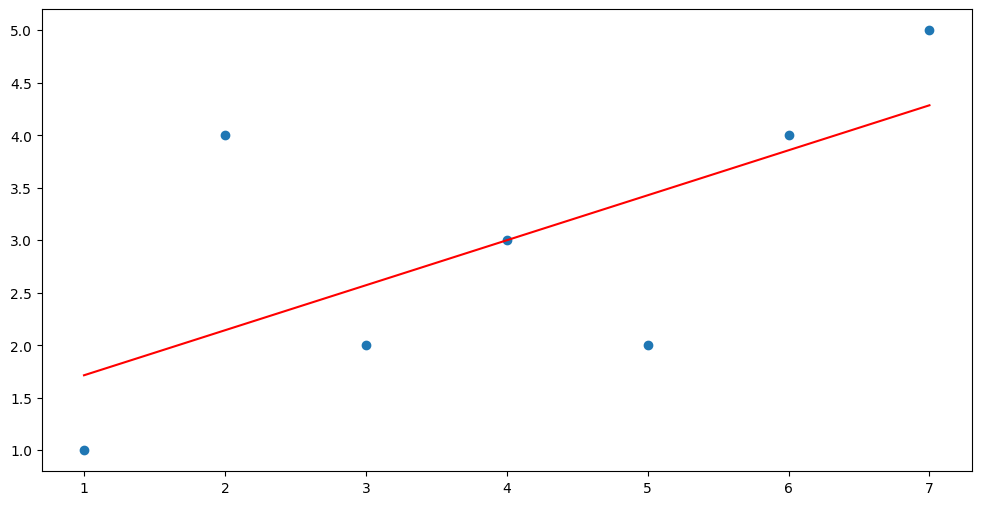

In [16]:
# 计算截距
b2 = y_mean - w2 * x_mean

print(b2)  # 输出截距


# 预测值
y_pred2 = w2 * x + b2


# 绘制
plt.figure(figsize=(12, 6))
plt.scatter(x, y)  # 绘制散点图
plt.plot(x, y_pred2, c='r')  # 绘制回归线 (红色)
plt.show()

# 1.3 生成虚拟数据

In [17]:
b = 1 # 截距
w = 2 # 系数
s = 100 # 假设生成s个数据

In [18]:
# 设置随机种子
np.random.seed(42)

# 生成100个随机样本数据
x = np.random.rand(100, 1)

# 显示x的形状
print(x.shape)

# 显示前10个数据
print(x[:10])

(100, 1)
[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]]


In [19]:
# 根据线性回归计算公式: y = wx + b
epsilon = np.random.randn(s, 1) * 0.1  # 噪声
y = w * x + b + epsilon  # 根据线性回归公式

y.shape

y[:10]  # 显示前10个数据点


array([[1.75778494],
       [2.87152788],
       [2.47316396],
       [1.99856008],
       [1.29007009],
       [1.3477003 ],
       [1.26395663],
       [2.68052527],
       [2.12138066],
       [2.36596945]])

In [20]:
s = x.shape[0]
indices = np.arange(s) #索引
np.random.shuffle(indices) #打乱索引
print(indices[:10])  # 打印前10个索引

[76 83 80 98  2 77 71 84 89 50]


# 1.4 分离 train 和 valid

In [21]:
#假设: 训练集占比80%, 验证集占比20%
train_indices = indices[:int(s*0.8)]
x_train, y_train = x[train_indices], y[train_indices]
print("训练集样本个数:", len(x_train))

valid_indices = indices[int(s*0.8):]
x_val, y_val = x[valid_indices], y[valid_indices]
print("验证集样本个数:", len(x_val))

训练集样本个数: 80
验证集样本个数: 20


Text(0.5, 1.0, 'Val Dataset')

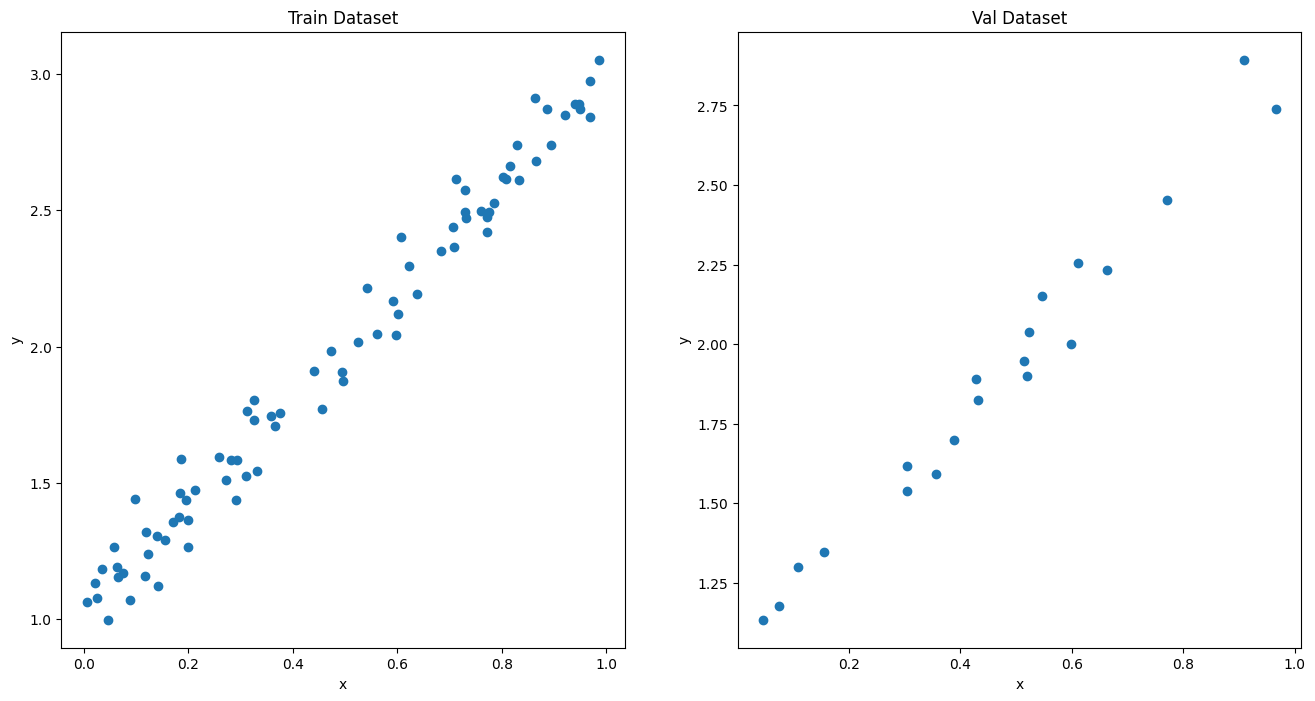

In [22]:
# 可视化显示训练和验证数据集

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

axes[0].scatter(x_train, y_train)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("Train Dataset")

axes[1].scatter(x_val, y_val)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("Val Dataset")


# 2. tensor 知识点

In [23]:
import torch

# tensor的四种数值类型
# 1. scalar 标量
# 2. vector 向量
# 3. matrix 矩阵
# 4. tensor 张量

scalar = torch.tensor(22.5)
vector = torch.tensor([1., 2., 3., 4.])
matrix = torch.ones((2, 2), dtype=torch.float)
tensor = torch.randn((3, 4, 5), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)


tensor(22.5000)
tensor([1., 2., 3., 4.])
tensor([[1., 1.],
        [1., 1.]])
tensor([[[ 0.5432,  1.1086, -0.1821, -0.1663, -2.2804],
         [-0.9163, -1.1599,  0.8384, -0.0483, -0.4808],
         [ 1.0466, -0.2625,  1.7204, -0.3507, -0.2397],
         [ 0.3937,  2.7154, -0.2123, -0.3431, -3.8226]],

        [[-0.9862, -0.2101,  0.7533,  1.7828,  0.3960],
         [-0.3843, -0.0711,  0.0164,  0.6457,  1.1376],
         [-0.5280,  1.1090, -0.1350,  1.3380,  0.0661],
         [-0.2454, -0.6369, -1.6574,  0.6369,  1.0153]],

        [[ 0.0869,  0.2803,  1.0150,  0.2237,  1.0499],
         [-0.5850,  0.3995, -0.6021,  0.0528, -0.3271],
         [ 0.3540,  0.1750, -0.0916,  1.1043,  0.8989],
         [ 0.6846,  0.9667,  1.6275, -1.5950,  0.0361]]])


In [24]:
# 获取tensor的shape
tensor.shape #属性


torch.Size([3, 4, 5])

In [25]:
tensor.size() #方法


torch.Size([3, 4, 5])

In [26]:
#对tensor进行reshape(变换维度)
t1 = tensor.reshape(4, -1) # reshape()
t1.shape

torch.Size([4, 15])

In [27]:
t1

tensor([[ 0.5432,  1.1086, -0.1821, -0.1663, -2.2804, -0.9163, -1.1599,  0.8384,
         -0.0483, -0.4808,  1.0466, -0.2625,  1.7204, -0.3507, -0.2397],
        [ 0.3937,  2.7154, -0.2123, -0.3431, -3.8226, -0.9862, -0.2101,  0.7533,
          1.7828,  0.3960, -0.3843, -0.0711,  0.0164,  0.6457,  1.1376],
        [-0.5280,  1.1090, -0.1350,  1.3380,  0.0661, -0.2454, -0.6369, -1.6574,
          0.6369,  1.0153,  0.0869,  0.2803,  1.0150,  0.2237,  1.0499],
        [-0.5850,  0.3995, -0.6021,  0.0528, -0.3271,  0.3540,  0.1750, -0.0916,
          1.1043,  0.8989,  0.6846,  0.9667,  1.6275, -1.5950,  0.0361]])

In [28]:
# Reshape the tensor using view()
t2 = tensor.view(4, -1)  # -1 automatically calculates the second dimension

In [29]:
print(t2.shape)

torch.Size([4, 15])


In [30]:
print(t2)

tensor([[ 0.5432,  1.1086, -0.1821, -0.1663, -2.2804, -0.9163, -1.1599,  0.8384,
         -0.0483, -0.4808,  1.0466, -0.2625,  1.7204, -0.3507, -0.2397],
        [ 0.3937,  2.7154, -0.2123, -0.3431, -3.8226, -0.9862, -0.2101,  0.7533,
          1.7828,  0.3960, -0.3843, -0.0711,  0.0164,  0.6457,  1.1376],
        [-0.5280,  1.1090, -0.1350,  1.3380,  0.0661, -0.2454, -0.6369, -1.6574,
          0.6369,  1.0153,  0.0869,  0.2803,  1.0150,  0.2237,  1.0499],
        [-0.5850,  0.3995, -0.6021,  0.0528, -0.3271,  0.3540,  0.1750, -0.0916,
          1.1043,  0.8989,  0.6846,  0.9667,  1.6275, -1.5950,  0.0361]])


In [31]:
# np 转 tensor
# 方式1: as_tensor()
x_train_tensor = torch.as_tensor(x_train).float()  # numpy -> tensor,数据类型:float32
y_train_tensor = torch.as_tensor(y_train).float()

print("原始类型:", type(x_train))
print("转换后类型:", type(x_train_tensor))


原始类型: <class 'numpy.ndarray'>
转换后类型: <class 'torch.Tensor'>


In [32]:
# 方式2: from_numpy()
x_train_tensor = torch.from_numpy(x_train).float()  # numpy -> tensor,数据类型:float32
y_train_tensor = torch.from_numpy(y_train).float()

print("原始类型:", type(x_train))
print("转换后类型:", type(x_train_tensor))

原始类型: <class 'numpy.ndarray'>
转换后类型: <class 'torch.Tensor'>


In [39]:
import torch
# 2.2 将数据部署到device上(CPU或GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).float().to(device)  # 部署到device上
y_train_tensor = torch.from_numpy(y_train).float().to(device)

x_val_tensor = torch.from_numpy(x_val).float().to(device)
y_val_tensor = torch.from_numpy(y_val).float().to(device)

print(device)

print(x_train_tensor.type())  # 查看数据的类型


cpu
torch.FloatTensor


In [34]:
# 2.3 tensor类型转换为 numpy array类型

# 报错
x_train_array = x_train_tensor.numpy()

# 解决
x_train_array = x_train_tensor.cpu().numpy()

type(x_train_array)


numpy.ndarray

In [35]:
# 2.4 为学习参数设置 requires_grad

# 为了计算 tensor 的梯度以及更新参数值，需要将 requires_grad 设置为 True
import torch
# 截距 (随机值)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device='cuda')

# 系数 (随机值)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device='cuda')

print(b)
print(w)


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

3 梯度下降法(手动实现)

梯度下降法--原理: 6个步骤

*   第1步: 随机初始化参数/权重
    
*   第2步: 前向传播: 计算模型预测值
    
*   第3步: 计算损失 (真值-预测值, 通常是MSE)
    
*   第4步: 反向传播: 计算梯度 (求导)
    
*   第5步: 更新参数
    
*   第6步: 重复以上步骤, 直到达到某个条件截止
    



In [36]:
#3.1 随机初始化参数/权重

np.random.seed(42)

w = np.random.randn(1)  # 系数,随机化初始值
b = np.random.randn(1)  # 截距,随机化初始值

print("w:", w, "b:", b)

w: [0.49671415] b: [-0.1382643]


In [37]:
# 3.2 前向传播:计算模型预测值
y_pred = w * x_train + b  # 根据线性回归的公式计算预测值

In [38]:
#3.3 计算损失
loss = ((y_train - y_pred) ** 2).mean()

print("loss:", loss)

loss: 3.661172358225687


In [ ]:
#3.4 反向传播:计算梯度(求导)


梯度(求导)计算公式

分别对参数w和参数b求导
$$
\frac{dMSE}{db} = \frac{dMSE}{d\hat{y_i}} \cdot \frac{d\hat{y_i}}{db} = \frac{1}{N} \sum_{i=1}^N 2(b + wx_i - y_i) = \frac{2}{N} \sum_{i=1}^N (\hat{y_i} - y_i) \
\frac{dMSE}{dw} = \frac{dMSE}{d\hat{y_i}} \cdot \frac{d\hat{y_i}}{dw} = \frac{1}{N} \sum_{i=1}^N 2(b + wx_i - y_i) \cdot x_i = \frac{2}{N} \sum_{i=1}^N x_i(\hat{y_i} - y_i)
$$

In [ ]:
# 注意:我们这里有2个参数:w和b,根据上述公式,可以计算出w和b的梯度:

b_grad = 2 * (y_pred - y_train).mean()

print("b_grad:", b_grad)

w_grad = 2 * ((y_pred - y_train) * x_train).mean()

print("w_grad:", w_grad)


3.5 更新参数
更新参数,计算公式:
$$
b = b - \eta \frac{\partial MSE}{\partial b} \
w = w - \eta \frac{\partial MSE}{\partial w}
$$


In [ ]:

# 设置学习率
lr = 0.1


# 输出原始的参数和参数的值
print("参数b:", b)
print("参数w:", w)


In [ ]:
# 更新参数(根据上述计算公式)

b = b - lr * b_grad

w = w - lr * w_grad

print("新的参数b:", b)
print("新的参数w:", w)

3.6 整合代码

In [ ]:
epochs = 1000  # 循环1000轮
lr = 0.1  # 学习率

# 第1步: 随机初始化参数/权重
np.random.seed(42)
b = np.random.randn(1)  # 参数
w = np.random.randn(1)  # 参数

for epoch in range(epochs):
    # 第2步: 前向传播: 计算模型预测值
    y_pred = w * x_train + b

    # 第3步: 计算损失 (真值 - 预测值, 通常是MSE)
    loss = ((y_train - y_pred) ** 2).mean()

    # 第4步: 反向传播: 计算梯度 (求导)
    b_grad = 2 * (y_pred - y_train).mean()
    w_grad = 2 * ((y_pred - y_train) * x_train).mean()

    # 第5步: 更新参数
    b = b - lr * b_grad
    w = w - lr * w_grad


In [ ]:
#输出
print("截距b = ", b)
print("系数w = ", w)


In [ ]:
#验证,通过模型来寻找系数和截距

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

model.fit(x_train.reshape(-1,1), y_train)

print("截距b:", model.intercept_)

print("系数w:", model.coef_[0])


4 自动求导: backward反向传播


In [ ]:
#4.1 代码重构,backward()反向传播,自动计算梯度
np.random.seed(42)

# 第1步:随机初始化参数/权重
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 第2步:前向传播:计算模型预测值
y_pred = w * x_train_tensor + b

# 第3步:计算损失(真值-预测值,通常是MSE)
loss = ((y_train_tensor - y_pred) ** 2).mean()

# 第4步:反向传播:计算梯度(求导)
loss.backward()

# 以下是手动计算梯度:
# b_grad = 2 * (y_pred - y_train).mean()
# w_grad = 2 * ((y_pred - y_train) * x_train_tensor).mean()

print("b_grad", b.grad)
print("w_grad", w.grad)


In [ ]:
#4.2 更新参数,梯度置零
np.random.seed(42)

# 第1步: 随机初始化参数/权重
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 第2步: 前向传播: 计算模型预测值
y_pred = x_train_tensor * w + b

# 第3步: 计算损失 (真值 - 预测值)
loss = ((y_train_tensor - y_pred) ** 2).mean()

# 第4步: 反向传播, 自动计算梯度
loss.backward()

# 第5步: 更新参数
with torch.no_grad():  # 这里用no_grad(), 是因为参数更新不涉及到梯度计算, 仅仅是参数更新
    b -= lr * b.grad
    w -= lr * w.grad

print("b_grad", b.grad)
print("w_grad", w.grad)

print()
# 梯度置零
b.grad.zero_()
w.grad.zero_()

print("梯度置零")
print("b_grad", b.grad)
print("w_grad:", w.grad)


In [ ]:
#查看Loss值
loss

In [ ]:
loss.item()

5 优化器 Optimizer

常用的优化器有：Adam 和 SGD

In [ ]:
#5.1 定义一个SGD
import torch.optim as optim

torch.manual_seed(42)

b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

lr = 0.01  # 学习率

# 优化器
optimizer = optim.SGD([b, w], lr=lr)

optimizer


In [ ]:
n_epochs = 1000

for epoch in range(n_epochs):
    # 模型预测值
    y_pred = w * x_train_tensor + b

    # 计算损失
    loss = ((y_train_tensor - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 梯度置零
    optimizer.zero_grad()

    # 手动梯度置零
    # b.grad.zero_()
    # w.grad.zero_()

print("b = ", b)
print("w = ", w)


6 损失函数 loss

在torch.nn包下有很多损失函数，例如: nn.MSELoss, nn.NLLLoss, nn.BCELoss等等，由于我们这里是线性回归，所以，采用nn.MSELoss

In [ ]:
loss_func = torch.nn.MSELoss(reduction='mean') #定义损失函数
loss_func


In [ ]:
#6.1 示例:计算损失值
# 真值
true_values = torch.tensor([2., 5., 9.])
print("真值: \n", true_values)
print()

# 预测值
pred_values = torch.tensor([3., 7., 11.])
print("预测值:\n", pred_values)


In [ ]:
loss_value = loss_func(true_values, pred_values)

print("损失值:", loss_value)


6.2 更新代码


In [ ]:
import torch.nn as nn

torch.manual_seed(42)

# 随机初始化参数
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# 定义超参数
n_epochs = 1000  # 循环次数
lr = 0.01  # 学习率

optimizer = optim.SGD([b, w], lr=lr)  # 优化器
loss_func = nn.MSELoss(reduction='mean')  # 损失函数

# 保存loss值
loss_history = []

for epoch in range(n_epochs):
    # 模型预测
    y_pred = w * x_train_tensor + b

    # 计算损失
    loss = loss_func(y_train_tensor, y_pred)  # 手动计算损失
    # loss = ((y_train_tensor - y_pred) ** 2).mean()

    # 保存每轮loss的结果
    loss_history.append(loss.item())

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 梯度置零
    optimizer.zero_grad()


In [ ]:
# 显示Loss的结果
plt.figure(figsize=(12, 6))
plt.plot(loss_history, c='b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Results")
plt.show()



7 前向传播【模型预测】代码升级

In [ ]:
#7.1 定义一个模型类
class LinearRG(nn.Module):
    #构造方法
    def __init__(self):
        super().__init__() #调用父类的构造方法

        #系数和截距 随机初始化
        b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

        # 将参数w和b 包装成模型的参数(目的:能够返回一个模型参数迭代器,可以当作属性获取)
        self.b = nn.Parameter(b)
        self.w = nn.Parameter(w)

    #前向传播
    def forward(self, x):
        return x * self.w + self.b #线性回归计算公式

LR_model = LinearRG() #创建类对象(即线性回归模型)


7.2 获取模型参数

In [ ]:

# 方法1:获取模型参数
list(LR_model.parameters())

In [ ]:
# 方法2:获取模型参数
LR_model.state_dict()

In [ ]:
# 1 设置device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("device:", device)

# 2 将模型部署到device上
LR_model = LinearRG().to(device)

print(LR_model.state_dict())


完整代码升级

In [ ]:
class LinearRG(nn.Module):
    # 构造方法
    def __init__(self):
        super().__init__()  # 调用父类的构造方法

        # 系数和截距 随机初始化
        b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

        # 将参数w和b 包装成模型的参数(目的:能够返回一个模型参数迭代器,可以当作属性获取)
        self.b = nn.Parameter(b)
        self.w = nn.Parameter(w)

    # 前向传播
    def forward(self, x):
        return x * self.w + self.b  # 线性回归计算公式


torch.manual_seed(42)  # 随机种子

# 判断是否有GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 数据集(依然使用之前生成的模拟数据)

# 训练集:x_train_tensor, y_train_tensor
# 验证集:x_val_tensor, y_val_tensor

# 创建模型对象
LR_model = LinearRG().to(device)

# 初始化超参数
n_epochs = 1000  # 训练轮数
lr = 0.01  # 学习率
loss_func = nn.MSELoss(reduction='mean')  # 损失函数
optimizer = optim.Adam(LR_model.parameters(), lr=lr)  # 优化器 Adam

# 保存loss值
loss_history = []

# 模型训练
for epoch in range(n_epochs):
    # 生命训练模式
    LR_model.train()

    # 前向传播,预测值
    y_pred = LR_model(x_train_tensor)

    # 计算损失
    loss = loss_func(y_train_tensor, y_pred)

    # 保存每轮loss的结果
    loss_history.append(loss.item())

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 梯度清零
    optimizer.zero_grad()



In [ ]:
# 输出模型参数
print(LR_model.state_dict())


In [ ]:
# 显示Loss的结果
plt.figure(figsize=(12,6))
plt.plot(loss_history, c='r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Results")
plt.show()

8 序列模型 Sequential Model

In [ ]:
model = nn.Sequential(nn.Linear(1, 1)).to(device)  # 1个线性层,1个输入,1个输出
model


8.1 用序列模型替代线性回归模型

In [ ]:
def train_process(model, loss_func, optimizer, x_train, y_train):
    # 声明训练模式
    model.train()
    # 前向传播
    y_pred = model(x_train)
    # 计算损失
    loss = loss_func(y_train, y_pred)
    # 反向传播
    loss.backward()
    # 参数更新
    optimizer.step()
    # 梯度置零
    optimizer.zero_grad()
    # 返回loss值
    return loss.item()

In [ ]:
# 1. 参数设置
n_epochs = 1000  # 训练轮数
lr = 0.01  # 学习率

model = nn.Sequential(nn.Linear(1, 1)).to(device)  # 序列模型
loss_func = nn.MSELoss(reduction='mean')  # 损失函数
optimizer = optim.SGD(model.parameters(), lr=lr)  # 优化器

In [ ]:
# 1. 模型训练
loss_history = list()

for epoch in range(n_epochs):
    # 模型训练
    loss_value = train_process(model, loss_func, optimizer, x_train_tensor, y_train_tensor)

    # 保存损失结果
    loss_history.append(loss_value)

In [ ]:
# 输出模型结构
print(model.state_dict())


In [ ]:

# 显示Loss的结果
plt.figure(figsize=(12, 6))
plt.plot(loss_history, c='y')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Results (Sequential Model)")
plt.show()


9 Dataset 【对数据集进行封装】

In [40]:
#9.1 自定义一个Dataset类【可以把Dataset理解成一个数据仓库,用来管理数据,方便读取】
from torch.utils.data import Dataset


# 自定义类
class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):  # 构造方法
        """
        参数说明:
            x_tensor: 特征数据
            y_tensor: 标签数据
        """
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        """
        根据索引获取数据

        参数说明:
            index: 索引/下标

        返回值:
            元组数据:(特征数据,标签数据)
        """
        return (self.x[index], self.y[index])

    def __len__(self):
        """
        数据集大小
        """
        return len(self.x)


In [41]:
# 示例演示

train_data = CustomDataset(x_train_tensor, y_train_tensor)

In [42]:
train_data[0] # 获取索引为0的数据

(tensor([0.7713]), tensor([2.4745]))

In [43]:

train_data[1] # 获取索引为1的数据

(tensor([0.0636]), tensor([1.1928]))

9.2 PyTorch中封装的类: TensorDataset


In [44]:
from torch.utils.data import TensorDataset

train_data = TensorDataset(x_train_tensor, y_train_tensor)


In [45]:
train_data[0] # 获取索引为0的数据

train_data[1] # 获取索引为1的数据

(tensor([0.0636]), tensor([1.1928]))

10 DataLoader: 对数据集进行batch分批处理

概念: DataLoader的作用是对数据集进行切片操作,一批一批的数据交给模型处理。DataLoader就像一个迭代器,每次循环读取一批不同的数据。

In [46]:
# 导入
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True) #对训练数据进一步封装,一批一批的读取,batch_size=8


In [49]:
# 获取一批数据,返回一个列表,包含:特征数据和标签数据
features, labels = next(iter(train_loader))

features.shape #特征数据

features


tensor([[0.5613],
        [0.2713],
        [0.9507],
        [0.4938],
        [0.1834],
        [0.0206],
        [0.5924],
        [0.0740]])

In [50]:
labels.shape #标签数据

torch.Size([8, 1])

In [51]:
labels

tensor([[2.0472],
        [1.5105],
        [2.8715],
        [1.9060],
        [1.4637],
        [1.1327],
        [2.1687],
        [1.1713]])

11 random_split 切分数据集

In [53]:
from torch.utils.data import random_split, TensorDataset, DataLoader

# 原始数据shape
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)

# 第1步:将原始数据集x和y,从numpy array 转换为 tensor类型

x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()
print("x_tensor shape:", x_tensor.shape)
print("y_tensor shape:", y_tensor.shape)

# 第2步:数据封装,将x_tensor与y_tensor打包
dataset = TensorDataset(x_tensor, y_tensor)

# 第3步:随机切分成train和val
train_dataset, val_dataset = random_split(dataset, [80, 20])  # train占比80个样本, val占比20个样本
print("train_dataset length:", len(train_dataset))
print("val_dataset length:", len(val_dataset))

train_dataloader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True) #对训练数据进一步封装,一批一批的读取,batch_size=8
val_dataloader = DataLoader(dataset=val_dataset, batch_size=12)


(100, 1)
(100, 1)
x_tensor shape: torch.Size([100, 1])
y_tensor shape: torch.Size([100, 1])
train_dataset length: 80
val_dataset length: 20


12 模型验证
注意

模型验证过程中,不需要计算梯度,所以,设置为: torch.no_grad()
模型验证前,设置为: model.eval()

In [54]:
def train_func(device, model, loss_fn, optimizer, train_loader):
    model.train()  # 声明train模式

    train_loss = []  # 保存loss

    for x_tensor, y_tensor in train_loader:

        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)

        y_pred = model(x_tensor)  # 模型预测
        loss = loss_fn(y_pred, y_tensor)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数
        optimizer.zero_grad()  # 梯度置零
        train_loss.append(loss.item())  # 保存

    # 返回
    return np.mean(train_loss)  # 损失均值


12.2 模型验证函数

In [55]:
def val_func(device, model, loss_fn, val_loader):
    model.eval()  # 声明eval模式
    val_loss = []  # 保存loss

    for x_tensor, y_tensor in val_loader:
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)

        y_pred = model(x_tensor)  # 模型预测
        loss = loss_fn(y_pred, y_tensor)  # 计算损失
        val_loss.append(loss.item())  # 保存损失

    # 返回
    return np.mean(val_loss)  # 损失均值


12.3 代码升级

In [57]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# 1. 设置随机种子
torch.manual_seed(42)

# 2. 确定设备
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 第1步: 将原始数据集 x 和 y 从 numpy array 转换为 tensor 类型
x_tensor = torch.as_tensor(x).float()
y_tensor = torch.as_tensor(y).float()

# 输出转换后的tensor形状
print("x_tensor shape:", x_tensor.shape)
print("y_tensor shape:", y_tensor.shape)

# 第2步: 数据封装，将 x_tensor 与 y_tensor 打包
dataset = TensorDataset(x_tensor, y_tensor)

# 第3步: 随机切分成 train 和 val
train_dataset, val_dataset = random_split(dataset, [80, 20])  # train 占比 80 个样本，val 占比 20 个样本

# 输出切分后的数据集大小
print("train_dataset length:", len(train_dataset))
print("val_dataset length:", len(val_dataset))

# 第4步: 进一步封装，将 dataset 打包丢进 DataLoader，成为一个可迭代对象
train_dataloader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=20)

# 第5步: 超参数配置
lr = 0.1  # 学习率
model = nn.Sequential(nn.Linear(1, 1)).to(device)  # 模型
loss_func = nn.MSELoss(reduction='mean')  # 损失函数
optimizer = optim.SGD(model.parameters(), lr=lr)  # 优化器

n_epochs = 200  # 训练轮数

train_history = []  # 训练损失
val_history = []  # 验证损失

# 第6步: 模型训练和验证
for epoch in range(0, n_epochs):
    # 计算train批处理后的损失
    train_loss = train_func(device, model, loss_func, optimizer, train_dataloader)
    train_history.append(train_loss)

    # 计算val批处理后的损失
    with torch.no_grad():
        val_loss = val_func(device, model, loss_func, val_dataloader)
        val_history.append(val_loss)


x_tensor shape: torch.Size([100, 1])
y_tensor shape: torch.Size([100, 1])
train_dataset length: 80
val_dataset length: 20


In [58]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9614]])), ('0.bias', tensor([1.0177]))])


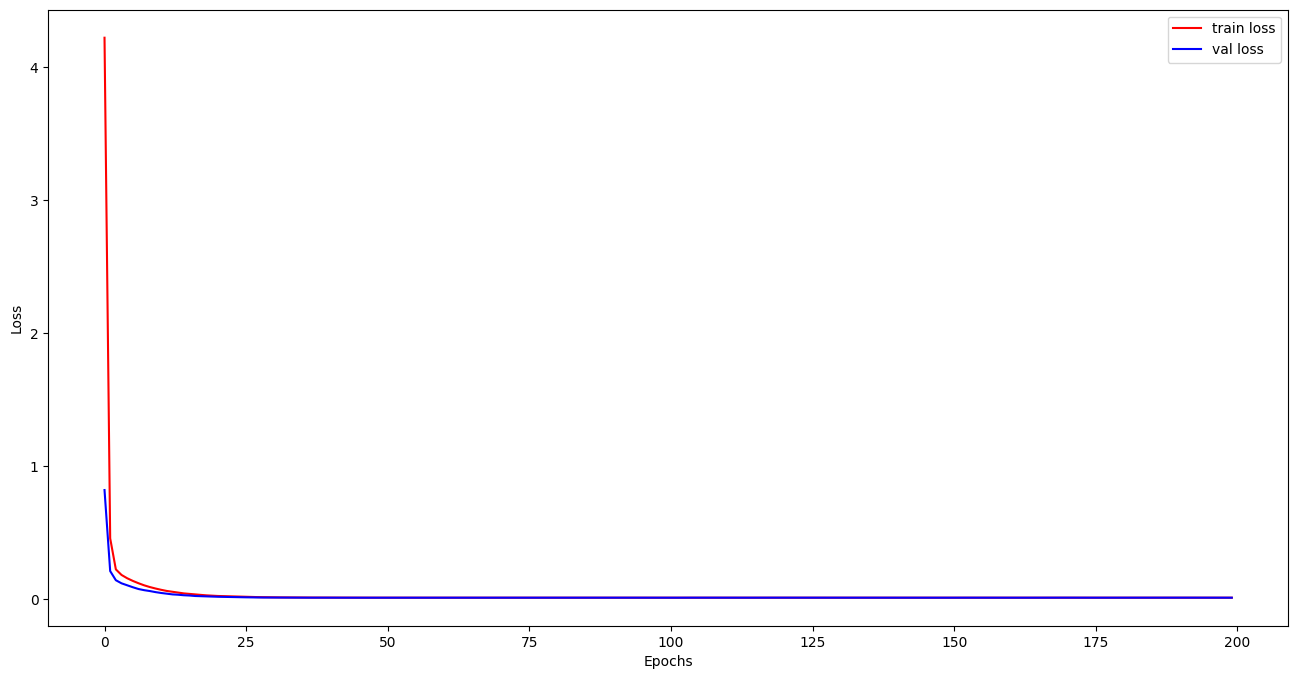

In [59]:
plt.figure(figsize=(16, 8))
plt.plot(train_history, c='r', label='train loss')
plt.plot(val_history, c='b', label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
